In [1]:
import netCDF4
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from pylab import *

In [2]:
# OBS
path = '/home/jcharrel/Documents/stage_M2/data/CALIPSO/'
ncfile_obs=path+"CALIPSO_3DCloudFraction_climato_concatenated_averaged_2008_2021_not_2016_r144x90.nc"
#ncfile_obs=path+"CALIPSO_3DCloudFraction_climato_concatenated_averaged_2007_2021_not_2016.nc"
#ncfile_obs=path+"CALIPSO_3DCloudFraction_climato_concatenated_averaged_2006_2009.nc"
#ncfile_obs=path+"CALIPSO_3DCloudFraction_climato_concatenated_averaged_2006_2012.nc"
nc_obs = netCDF4.Dataset(ncfile_obs)

ncfile_alt_mid=path+"CALIPSO_3DCloudFraction_alt_mid.nc"
nc_alt_mid = netCDF4.Dataset(ncfile_alt_mid)

In [3]:
# LMDZ6A
path = '/home/jcharrel/Documents/stage_M2/data/LMDZ6A/'
#ncfile_lmdz6a=path+"LmdzOr6Actrl_SE_1980_1999_1M_histmthCOSP_3Dclcalipso_nan_r144x90.nc"
ncfile_lmdz6a=path+"LmdzOr6Actrl_SE_1980_1999_1M_histmthCOSP_3Dclcalipso.nc"
nc_lmdz6a = netCDF4.Dataset(ncfile_lmdz6a)

In [4]:
# MASK
path = '/home/jcharrel/Documents/stage_M2/data/LMDZ6A/'
ncfile_mask=path+"LmdzOr6Actrl_SE_1980_1999_1M_histmth_phis_r144x90.nc"
nc_mask = netCDF4.Dataset(ncfile_mask)

In [6]:
# GRID
lon = nc_obs.variables['lon'][:]
lat = nc_obs.variables['lat'][:]
lon_lmdz6a = nc_lmdz6a.variables['lon'][:]
lat_lmdz6a = nc_lmdz6a.variables['lat'][:]
alt_mid = nc_alt_mid.variables['alt_mid'][:] #levels

In [7]:
# LONGITUDINAL MEAN

# VARIABLES - OBS
clobs = np.mean(nc_obs.variables['clcalipso'][0,:,:,:], axis=2)*1e2

# VARIABLES - LMDZ6A
cllmdz6a = np.mean(nc_lmdz6a.variables['clcalipso'][:,:,:,:], axis=(0,3))
cllmdz6a = np.nanmean(np.nanmean(nc_lmdz6a.variables['clcalipso'][:],axis=0),axis=2)*1e2

In [8]:
print('Max de couverture nuageuse dans GOCCP :', np.max(clobs))
print('Moyenne de couverture nuageuse dans GOCCP :', np.mean(clobs))
print('Max de couverture nuageuse dans LMDZ6A :', np.max(cllmdz6a))

Max de couverture nuageuse dans GOCCP : 49.83750449286567
Moyenne de couverture nuageuse dans GOCCP : 7.48276437350973
Max de couverture nuageuse dans LMDZ6A : 33.282055


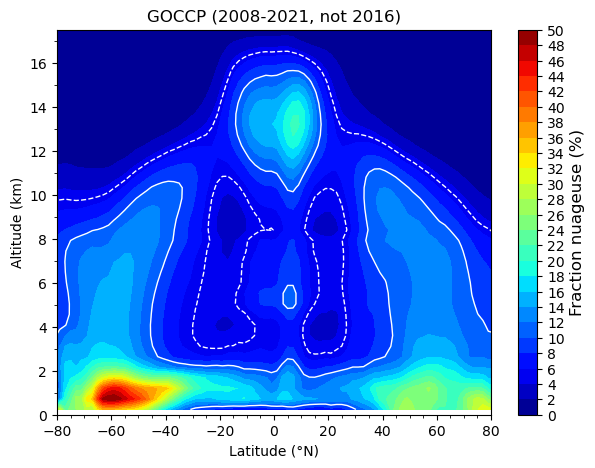

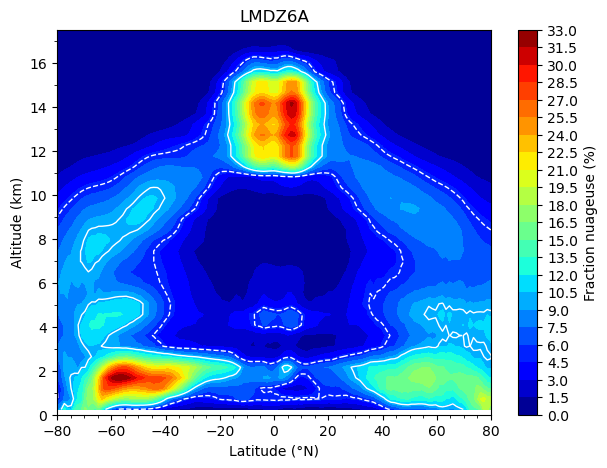

In [12]:
from matplotlib.colors import BoundaryNorm

clevs = np.arange(0, 51, 2)

plt.figure(figsize=(7,5))
cs = plt.contourf(lat, alt_mid, clobs, clevs, cmap='jet')
plt.contour(lat, alt_mid, clobs, levels=[10], colors='w', linewidths=1.0)
plt.contour(lat, alt_mid, clobs, levels=[5], linestyles='--', colors='w', linewidths=1.0)
plt.xlabel('Latitude (°N)')
plt.ylabel('Altitude (km)')
plt.title('GOCCP (2008-2021, not 2016)')
plt.ylim(0,17.5)
plt.xlim(-80,80)
cb = plt.colorbar(cs, ticks=clevs)
cb.set_label('Fraction nuageuse (%)', fontsize=12)
ax1 = plt.gca()
ax1.xaxis.set_major_locator(MultipleLocator(20))
ax1.xaxis.set_minor_locator(MultipleLocator(5))
ax1.yaxis.set_major_locator(MultipleLocator(2))
ax1.yaxis.set_minor_locator(MultipleLocator(1))

clevs = np.arange(0, 33.5, 1.5)
plt.figure(figsize=(7,5))
cs = plt.contourf(lat_lmdz6a, alt_mid, cllmdz6a, clevs, cmap='jet')
plt.contour(lat_lmdz6a, alt_mid, cllmdz6a, levels=[10], colors='w', linewidths=1.0)
plt.contour(lat_lmdz6a, alt_mid, cllmdz6a, levels=[5], linestyles='--', colors='w', linewidths=1.0)
plt.xlabel('Latitude (°N)')
plt.ylabel('Altitude (km)')
plt.title('LMDZ6A')
plt.ylim(0,17.5)
plt.xlim(-80,80)
plt.colorbar(cs, ticks=clevs, label='Fraction nuageuse (%)')
ax2 = plt.gca()
ax2.xaxis.set_major_locator(MultipleLocator(20))
ax2.xaxis.set_minor_locator(MultipleLocator(5))
ax2.yaxis.set_major_locator(MultipleLocator(2))
ax2.yaxis.set_minor_locator(MultipleLocator(1))